Import required libraries and set up

In [1]:
#Imports and Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")


Locate data, read into notebook as a dataframe; Observe initial load of the data

In [2]:
file_path = "../data/raw/CMS_Beneficiary_Combined.csv"

df = pd.read_csv(file_path)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349064 entries, 0 to 349063
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   DESYNPUF_ID               349064 non-null  object 
 1   BENE_BIRTH_DT             349064 non-null  int64  
 2   BENE_DEATH_DT             5274 non-null    float64
 3   BENE_SEX_IDENT_CD         349064 non-null  int64  
 4   BENE_RACE_CD              349064 non-null  int64  
 5   BENE_ESRD_IND             349064 non-null  object 
 6   SP_STATE_CODE             349064 non-null  int64  
 7   BENE_COUNTY_CD            349064 non-null  int64  
 8   BENE_HI_CVRAGE_TOT_MONS   349064 non-null  int64  
 9   BENE_SMI_CVRAGE_TOT_MONS  349064 non-null  int64  
 10  BENE_HMO_CVRAGE_TOT_MONS  349064 non-null  int64  
 11  PLAN_CVRG_MOS_NUM         349064 non-null  int64  
 12  SP_ALZHDMTA               349064 non-null  int64  
 13  SP_CHF                    349064 non-null  i

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,...,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,00000B48BCF4AD29,19230901,NaN,2,5,0,10,260,12,12,...,1,81000.0,3072.0,0.0,1520.0,80.0,0.0,6260.0,1520.0,0.0
1,0000525AB30E4DEF,19201001,NaN,2,1,0,31,300,12,12,...,1,13260.0,2048.0,0.0,1760.0,670.0,0.0,3830.0,1010.0,50.0
2,00009C897C3D8372,19320101,NaN,1,1,Y,7,70,12,12,...,2,37500.0,4096.0,0.0,100.0,160.0,0.0,1540.0,280.0,60.0
3,0001168CE43BE51B,19340901,NaN,2,1,0,6,200,12,12,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0002E494BC87CE10,19140701,NaN,1,2,0,5,200,2,2,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#Renaming columns

df.rename(columns={
    'DESYNPUF_ID' : 'Beneficiary Code',
    'BENE_BIRTH_DT' : 'Birth_date',
    'BENE_DEATH_DT': 'Date_of_Death',
    'BENE_SEX_IDENT_CD' : 'Gender',
    'BENE_RACE_CD': 'Race',
    'BENE_ESRD_IND' : 'End_Stage_Renal_Disease_Indicator',
    'SP_STATE_CODE' : 'State_code',
    'BENE_COUNTY_CD' : 'County_code',
    'BENE_HI_CVRAGE_TOT_MONS' : 'Number_of_months_covered_a',
    'BENE_SMI_CVRAGE_TOT_MONS' : 'Numver_of_months_covered_b',
    'BENE_HMO_CVRAGE_TOT_MONS': 'Number_of_months_HMO_coverage',
    'PLAN_CVRG_MOS_NUM': 'Number_of_months_covered_d',
    'SP_ALZHDMTA': 'Alzhiemers_or_senile',
    'SP_CHF' : 'Heart_Failure',
    'SP_CHRNKIDN': 'Chronic_Kidney',
    'SP_CNCR': 'Cancer',
    'SP_COPD': 'COPD',
    'SP_DEPRESSN': 'Depression',
    'SP_DIABETES': 'Diabetes',
    'SP_ISCHMCHT' : 'ischemic_Heart_Disease',
    'SP_OSTEOPRS' : 'Osteoporosis',
    'SP_RA_OA': 'Rheumatoid_Arthritis',
    'SP_STRKETIA' : 'Stroke',
    'MEDREIMB_IP': 'IP_reimbursement',
    'BENRES_IP' : 'IP_Bene_Amount',
    'PPPYMT_IP' : 'IP_primary_payer_reimbursement',
    'MEDREIMB_OP': 'OP_medicare_reimbursement',
    'BENRES_OP': 'OP_bene_resp_amount',
    'PPPYMT_OP': 'OP_primary',
    'MEDREIMB_CAR': 'Carrier_medicare_reimb',
    'BENRES_CAR': 'Carrier_bene_amount',
    'PPPYMT_CAR': 'Carrier_annual_payer_reimb'
}, inplace=True)

print(df.head())

   Beneficiary Code  Birth_date  Date_of_Death  Gender  Race  \
0  00000B48BCF4AD29    19230901            NaN       2     5   
1  0000525AB30E4DEF    19201001            NaN       2     1   
2  00009C897C3D8372    19320101            NaN       1     1   
3  0001168CE43BE51B    19340901            NaN       2     1   
4  0002E494BC87CE10    19140701            NaN       1     2   

  End_Stage_Renal_Disease_Indicator  State_code  County_code  \
0                                 0          10          260   
1                                 0          31          300   
2                                 Y           7           70   
3                                 0           6          200   
4                                 0           5          200   

   Number_of_months_covered_a  Numver_of_months_covered_b  ...  Stroke  \
0                          12                          12  ...       1   
1                          12                          12  ...       1   
2       

Data overview: understand the strucutre, data types and completeness 

In [4]:
df.shape

(349064, 32)

In [5]:
df.dtypes.value_counts()

int64      20
float64    10
object      2
Name: count, dtype: int64

In [6]:
#Basic info
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Beneficiary Code,349064,349064,00000B48BCF4AD29,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Birth_date,349064.0,NaN,NaN,NaN,19363761.036268,124945.593334,19090101.0,19281101.0,19360601.0,19420301.0,19831201.0
Date_of_Death,5274.0,NaN,NaN,NaN,20080649.217672,344.892633,20080101.0,20080401.0,20080601.0,20080976.0,20081201.0
Gender,349064.0,NaN,NaN,NaN,1.556726,0.496772,1.0,1.0,2.0,2.0,2.0
Race,349064.0,NaN,NaN,NaN,1.283381,0.754206,1.0,1.0,1.0,1.0,5.0
End_Stage_Renal_Disease_Indicator,349064,2,0,324309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State_code,349064.0,NaN,NaN,NaN,25.756618,15.561922,1.0,11.0,25.0,39.0,54.0
County_code,349064.0,NaN,NaN,NaN,365.277812,266.150566,0.0,140.0,330.0,550.0,999.0
Number_of_months_covered_a,349064.0,NaN,NaN,NaN,11.142063,2.848267,0.0,12.0,12.0,12.0,12.0
Numver_of_months_covered_b,349064.0,NaN,NaN,NaN,10.491586,3.766494,0.0,12.0,12.0,12.0,12.0


Date_of_Death                     0.984891
Beneficiary Code                  0.000000
Depression                        0.000000
Carrier_bene_amount               0.000000
Carrier_medicare_reimb            0.000000
OP_primary                        0.000000
OP_bene_resp_amount               0.000000
OP_medicare_reimbursement         0.000000
IP_primary_payer_reimbursement    0.000000
IP_Bene_Amount                    0.000000
IP_reimbursement                  0.000000
Stroke                            0.000000
Rheumatoid_Arthritis              0.000000
Osteoporosis                      0.000000
ischemic_Heart_Disease            0.000000
Diabetes                          0.000000
COPD                              0.000000
Birth_date                        0.000000
Cancer                            0.000000
Chronic_Kidney                    0.000000
dtype: float64

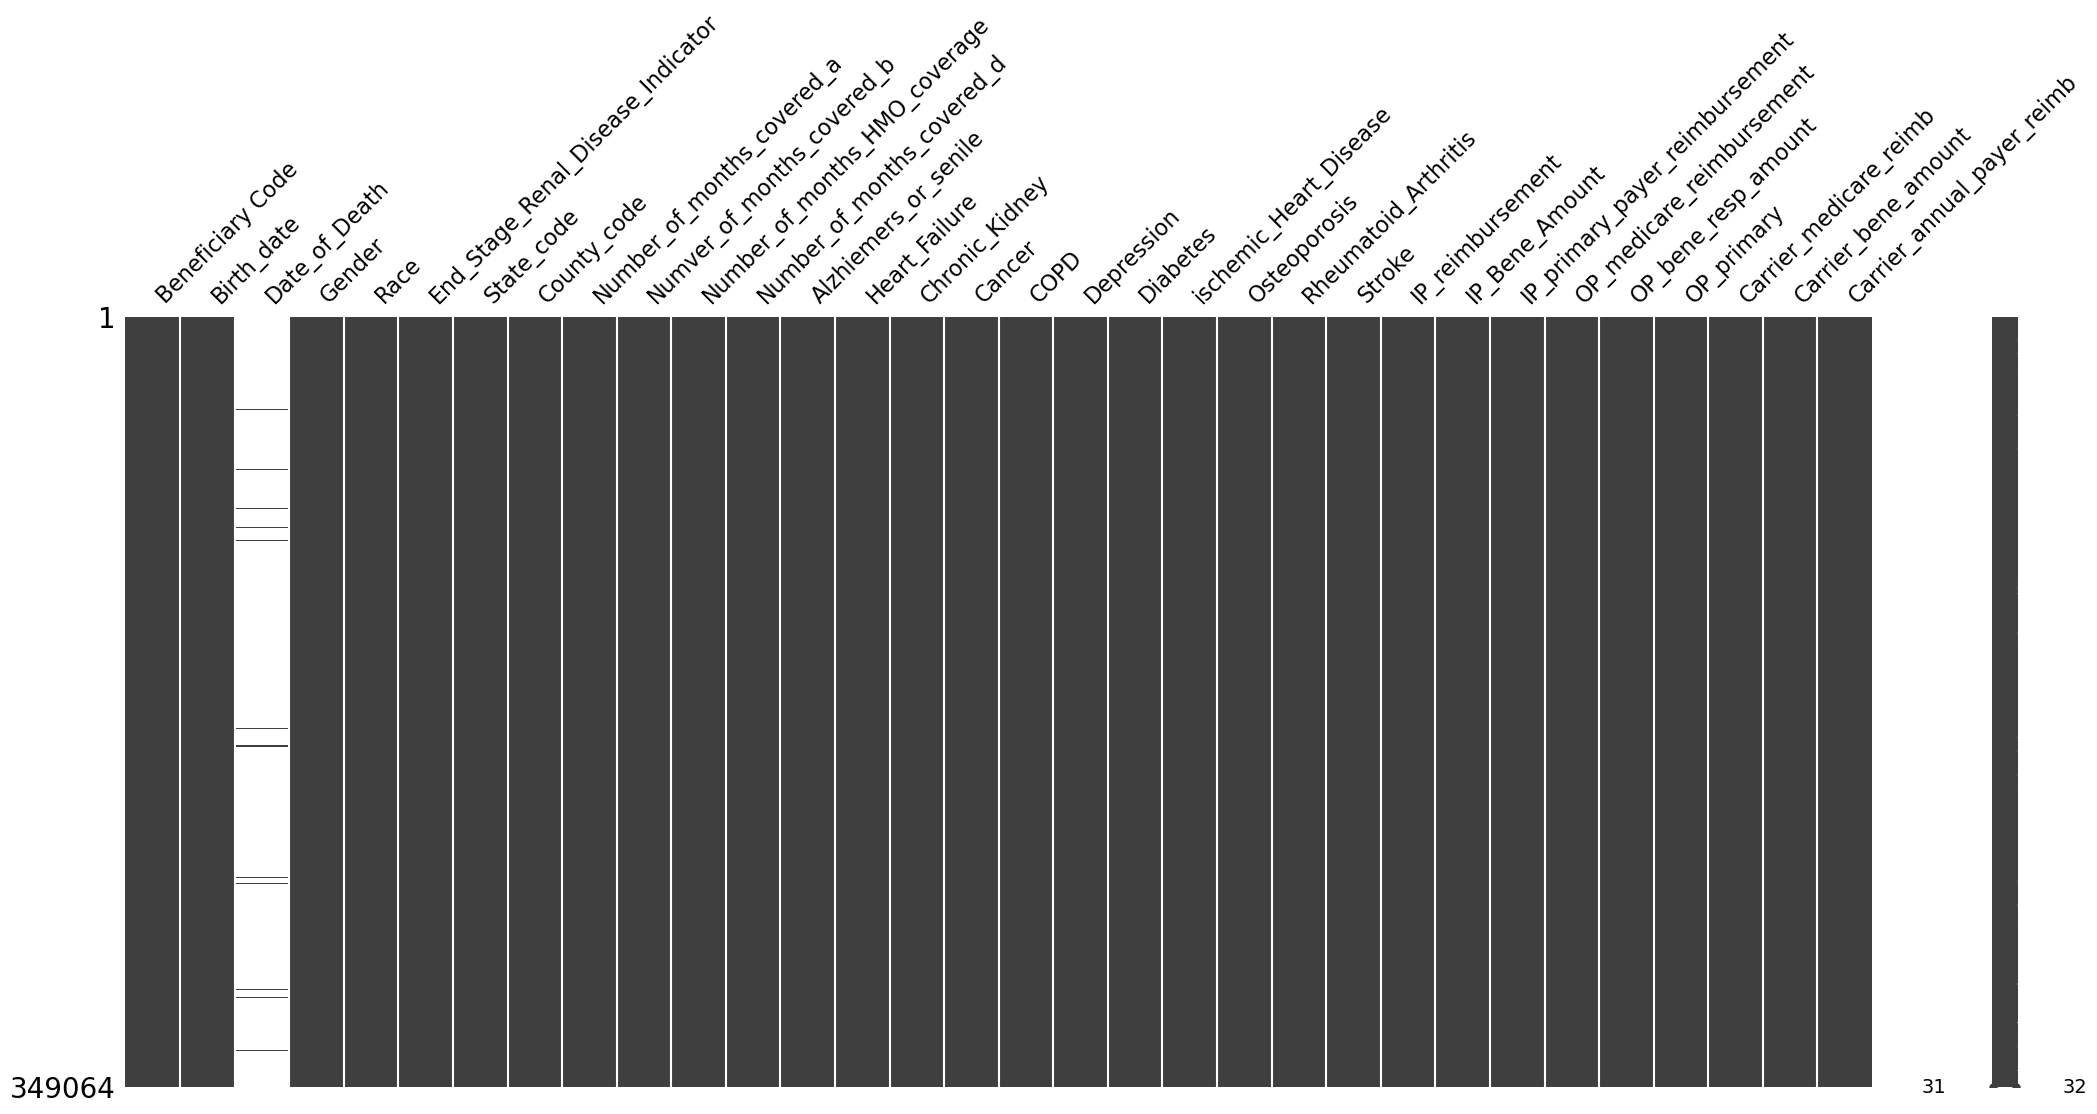

In [7]:
#Missing Data
msno.matrix(df)
df.isnull().mean().sort_values(ascending=False).head(20)

#Observations: 

There is only one column that contains a significant amount of missing values; column is date of death.

In [8]:
data_dict = {
    # === Beneficiary Identification & Demographics ===
    "DESYNPUF_ID": "DESYNPUF: Beneficiary Code",
    "BENE_BIRTH_DT": "DESYNPUF: Date of birth",
    "BENE_DEATH_DT": "DESYNPUF: Date of death",
    "BENE_SEX_IDENT_CD": "DESYNPUF: Sex",
    "BENE_RACE_CD": "DESYNPUF: Beneficiary Race Code",
    "BENE_ESRD_IND": "DESYNPUF: End Stage Renal Disease Indicator",
    "SP_STATE_CODE": "DESYNPUF: State Code",
    "BENE_COUNTY_CD": "DESYNPUF: County Code",

    # === Coverage Months ===
    "BENE_HI_CVRAGE_TOT_MONS": "DESYNPUF: Total number of months of Part A coverage for the beneficiary",
    "BENE_SMI_CVRAGE_TOT_MONS": "DESYNPUF: Total number of months of Part B coverage for the beneficiary",
    "BENE_HMO_CVRAGE_TOT_MONS": "DESYNPUF: Total number of months of HMO coverage for the beneficiary",
    "PLAN_CVRG_MOS_NUM": "DESYNPUF: Total number of months of Part D plan coverage for the beneficiary",

    # === Chronic Conditions (SP_*) ===
    "SP_ALZHDMTA": "DESYNPUF: Chronic Condition – Alzheimer or related disorders or senile dementia",
    "SP_CHF": "DESYNPUF: Chronic Condition – Heart Failure",
    "SP_CHRNKIDN": "DESYNPUF: Chronic Condition – Chronic Kidney Disease",
    "SP_CNCR": "DESYNPUF: Chronic Condition – Cancer",
    "SP_COPD": "DESYNPUF: Chronic Condition – Chronic Obstructive Pulmonary Disease",
    "SP_DEPRESSN": "DESYNPUF: Chronic Condition – Depression",
    "SP_DIABETES": "DESYNPUF: Chronic Condition – Diabetes",
    "SP_ISCHMCHT": "DESYNPUF: Chronic Condition – Ischemic Heart Disease",
    "SP_OSTEOPRS": "DESYNPUF: Chronic Condition – Osteoporosis",
    "SP_RA_OA": "DESYNPUF: Chronic Condition – Rheumatoid Arthritis and Osteoarthritis (RA/OA)",
    "SP_STRKETIA": "DESYNPUF: Chronic Condition – Stroke / Transient Ischemic Attack",

    # === Inpatient Reimbursement & Payment ===
    "MEDREIMB_IP": "DESYNPUF: Inpatient annual Medicare reimbursement amount",
    "BENRES_IP": "DESYNPUF: Inpatient annual beneficiary responsibility amount",
    "PPPYMT_IP": "DESYNPUF: Inpatient annual primary payer reimbursement amount",

    # === Outpatient Institutional Reimbursement & Payment ===
    "MEDREIMB_OP": "DESYNPUF: Outpatient Institutional annual Medicare reimbursement amount",
    "BENRES_OP": "DESYNPUF: Outpatient Institutional annual beneficiary responsibility amount",
    "PPPYMT_OP": "DESYNPUF: Outpatient Institutional annual primary payer reimbursement amount",

    # === Carrier (Physician/Supplier) Reimbursement & Payment ===
    "MEDREIMB_CAR": "DESYNPUF: Carrier annual Medicare reimbursement amount",
    "BENRES_CAR": "DESYNPUF: Carrier annual beneficiary responsibility amount",
    "PPPYMT_CAR": "DESYNPUF: Carrier annual primary payer reimbursement amount",
}

# --- Display Data Dictionary Preview ---
data_dict_df = pd.DataFrame({
    "Variable": list(data_dict.keys()),
    "Label / Definition": list(data_dict.values())
})

# Show first few rows
display(data_dict_df)

,Variable,Label / Definition
0,DESYNPUF_ID,DESYNPUF: Beneficiary Code
1,BENE_BIRTH_DT,DESYNPUF: Date of birth
2,BENE_DEATH_DT,DESYNPUF: Date of death
3,BENE_SEX_IDENT_CD,DESYNPUF: Sex
4,BENE_RACE_CD,DESYNPUF: Beneficiary Race Code
5,BENE_ESRD_IND,DESYNPUF: End Stage Renal Disease Indicator
6,SP_STATE_CODE,DESYNPUF: State Code
7,BENE_COUNTY_CD,DESYNPUF: County Code
8,BENE_HI_CVRAGE_TOT_MONS,DESYNPUF: Total number of months of Part A cov...
9,BENE_SMI_CVRAGE_TOT_MONS,DESYNPUF: Total number of months of Part B cov...


In [9]:
#Check for duplicates
df.duplicated().sum()

np.int64(0)

In [10]:
#Convert Columns to correct data types

df['Birth_date'] = pd.to_datetime(df['Birth_date'], errors='coerce')

df['Date_of_Death'] = pd.to_datetime(df['Date_of_Death'], errors='coerce')

print(df['Birth_date'].head(2))

0   1970-01-01 00:00:00.019230901
1   1970-01-01 00:00:00.019201001
Name: Birth_date, dtype: datetime64[ns]


The average age of beneficiary is 55.0 and the median age is 55.0


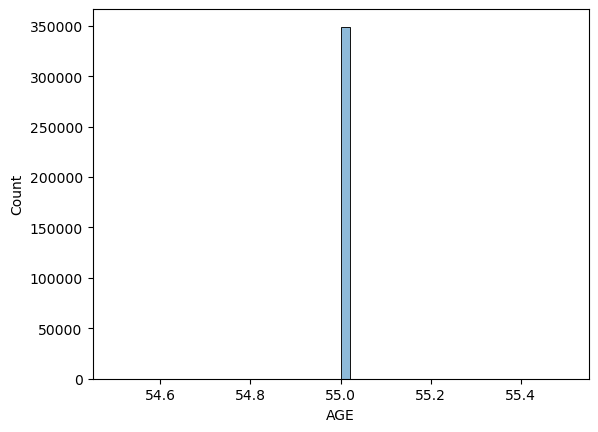

In [11]:
# Age calculation
df['AGE'] = (pd.Timestamp('2024-12-31') - df['Birth_date']).dt.days // 365

avg_age = df['AGE'].mean()
med_age = df['AGE'].median()
sns.histplot(df['AGE'], bins=50, kde=True)

print(f'The average age of beneficiary is {avg_age} and the median age is {med_age}')


Observation: 

As of December 31, 2024 the average and median ages of claims beneficiaries in this data set is 55. This data only has records of people who are this age. The model and data will only be able to make inferences on people in this age group; & potenitally +/- 5 years. 

People in this age group typically have better insurance converage due to higher levels of economic resources.

We would expect a lower claim default rate and higher levels of reimbursements. 

In [12]:
#Separate Categorical and Numeric Features

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O' and not pd.api.types.is_datetime64_any_dtype(df[feature])]
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']
date_features = [feature for feature in df.columns if pd.api.types.is_datetime64_any_dtype(df[feature])]

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nwe have {} categorical features : {}'.format(len(categorical_features),categorical_features))
print('\nwe have {} date features : {}'.format(len(date_features),date_features))

We have 29 numerical features : ['Gender', 'Race', 'State_code', 'County_code', 'Number_of_months_covered_a', 'Numver_of_months_covered_b', 'Number_of_months_HMO_coverage', 'Number_of_months_covered_d', 'Alzhiemers_or_senile', 'Heart_Failure', 'Chronic_Kidney', 'Cancer', 'COPD', 'Depression', 'Diabetes', 'ischemic_Heart_Disease', 'Osteoporosis', 'Rheumatoid_Arthritis', 'Stroke', 'IP_reimbursement', 'IP_Bene_Amount', 'IP_primary_payer_reimbursement', 'OP_medicare_reimbursement', 'OP_bene_resp_amount', 'OP_primary', 'Carrier_medicare_reimb', 'Carrier_bene_amount', 'Carrier_annual_payer_reimb', 'AGE']

we have 2 categorical features : ['Beneficiary Code', 'End_Stage_Renal_Disease_Indicator']

we have 2 date features : ['Birth_date', 'Date_of_Death']


In [13]:
#Vlaues of each category column and their counts

for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print('--------------------------------')

Beneficiary Code
00000B48BCF4AD29    0.000286
FFCA6A53B978E4A6    0.000286
FFCDE66B72F356B3    0.000286
FFCC8FA01F9C40FC    0.000286
FFCC2B9BE9DA33C6    0.000286
                      ...   
FFE5056E724C9F0A    0.000286
FFE300F6CFB9EFB0    0.000286
FFE2A14849740004    0.000286
FFE155A5607F8A7F    0.000286
FFFFE00DD0AA36E0    0.000286
Name: proportion, Length: 349064, dtype: float64
--------------------------------
End_Stage_Renal_Disease_Indicator
0    92.908177
Y     7.091823
Name: proportion, dtype: float64
--------------------------------


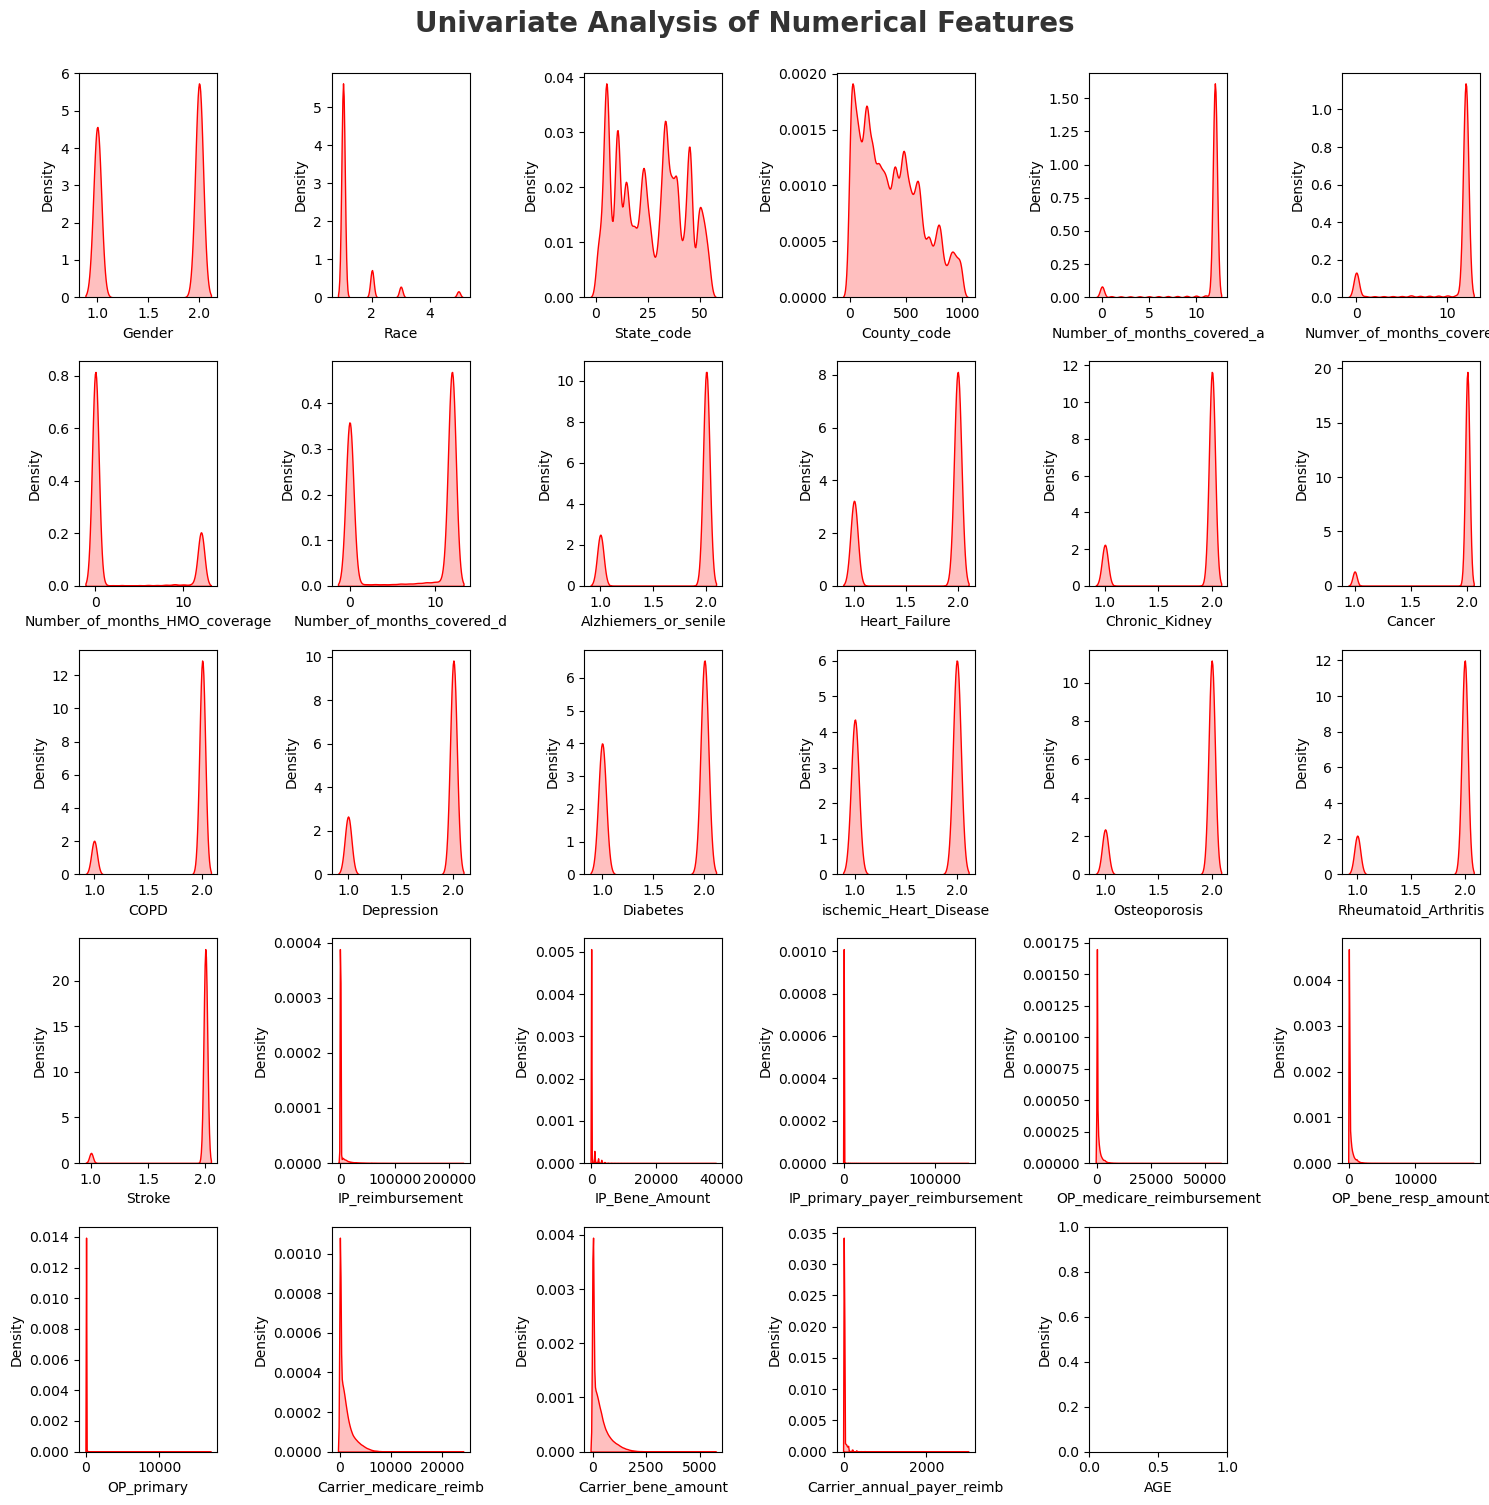

In [14]:
# Proportion of count data on numerical columns

plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20,fontweight='bold',alpha=0.8,y=1)

for i in range(0, len(numeric_features)):
    plt.subplot(5,6,i+1)
    sns.kdeplot(x=df[numeric_features[i]],fill=True,color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

##Univariate observations

Based on the distributions there a a large number of features that are binary; for example cancer or not, stroke or not, diabetes or not.

The nubmer of months of coverage looks to be as expected where we see a large majority of patients having coverage for the full year and a smaller amount with no coverage, most likely due to thier coverage expiring/ending

There are a couple features that have skewness. There are medicare reimbursement and beneficiary amount. These feature are right skewed, meaning that there are some outliers present most likely driving up some of the descriptive statistics 

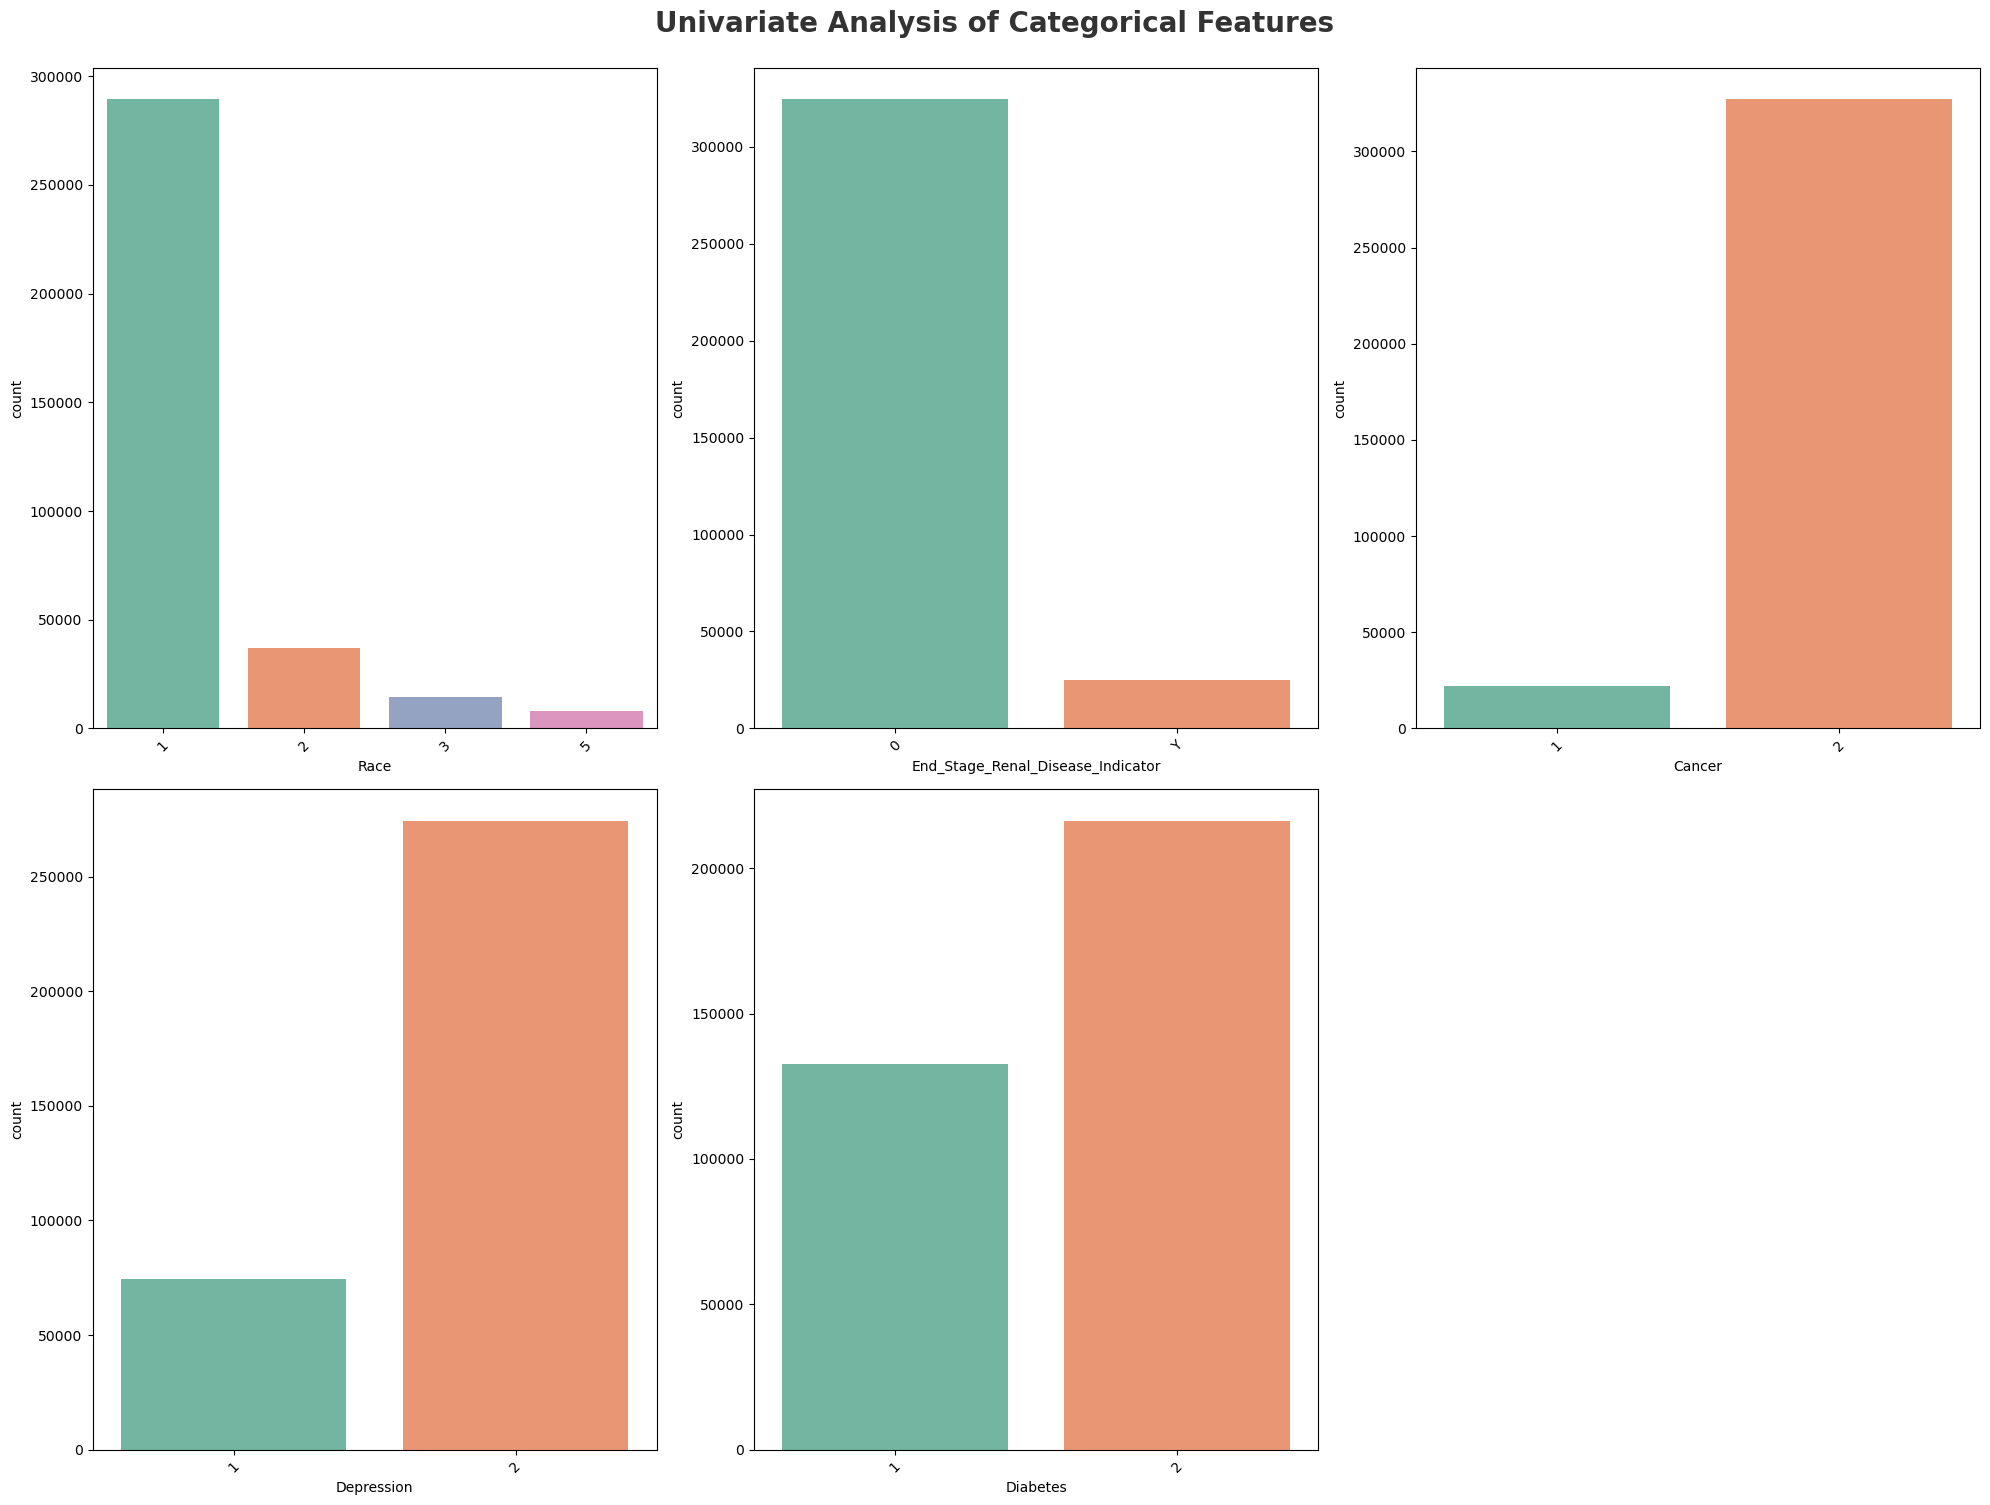

In [15]:
# Categorical Column Univariate analysis

plt.figure(figsize=(20,15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold',alpha=0.8, y=1.)
category= ['Race', 'End_Stage_Renal_Disease_Indicator','Cancer', 'Depression', 'Diabetes']

for i in range(0,len(category)):
    plt.subplot(2,3,i+1)
    sns.countplot(x=df[category[i]], palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

<Axes: ylabel='count'>

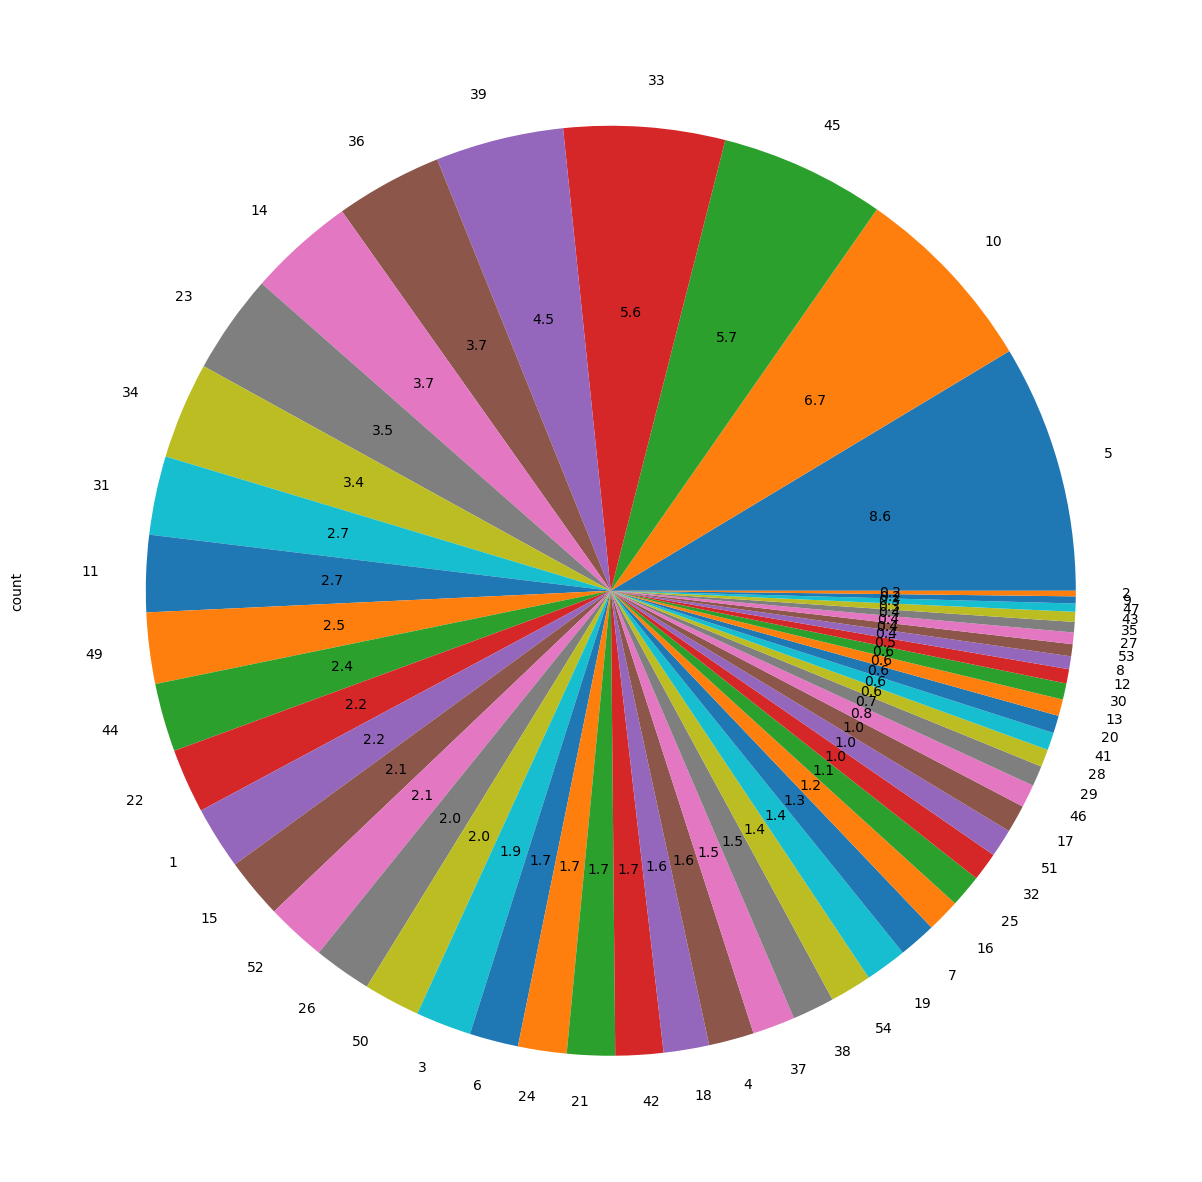

In [16]:
df['State_code'].value_counts().plot.pie(y=df['State_code'],figsize=(15,16),autopct='%1.1f')

The states that we see the most claims coming from are AR, DE, SC, NH, OH. This indicated that any regional biases/conclusions are no present and this sample can make inferences on beneficiaries from all around the US

In [17]:
#Top 10 states

category = pd.DataFrame(df['State_code'].value_counts())
category.rename(columns = {'State_code':'Count'},inplace=True)

category.head(10)

,count
State_code,
5,30081
10,23338
45,20026
33,19536
39,15546
36,12982
14,12922
23,12101
34,11726


Bivariate brainstorming

Total reimbursement vs state; Total reimbursement vs race; total reimbursement vs gender; vs renal diease indicator

Sex and Various chronic conditions (cancer, kidney, heart)

State and various chronic conditions 

Total Beneficiary responsibility vs above

Total primary payer payment by vs above

In [18]:
#create Total reimbursement

df['total_reimbursement'] = df[['IP_reimbursement','OP_medicare_reimbursement','Carrier_medicare_reimb']].sum(axis=1)

#create total beneficiary amount

df['total_beneficiary_amount'] = df[['IP_Bene_Amount','OP_bene_resp_amount','Carrier_bene_amount']].sum(axis=1)

#create total primary payment

df['total_primary_payment'] = df[['IP_primary_payer_reimbursement','OP_primary','Carrier_annual_payer_reimb']].sum(axis=1)

Text(0, 0.5, 'Reimbursement')

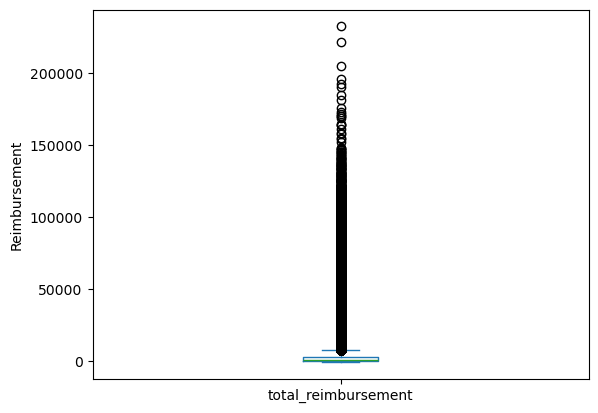

In [22]:
ax = (df['total_reimbursement']).plot.box()
ax.set_ylabel("Reimbursement")

there are a signigficant amount of outliers in this column, this could potentially influence insights

Text(0, 0.5, 'Reimbursement')

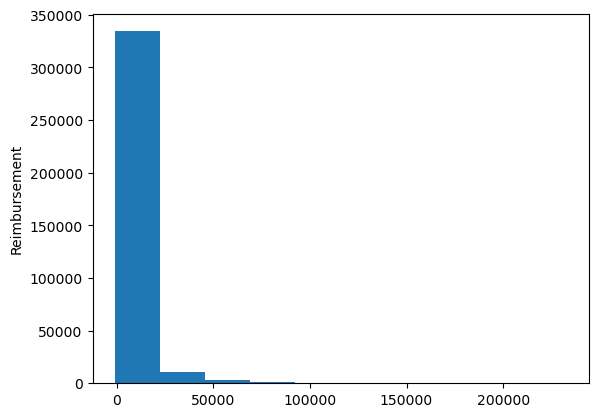

In [23]:
ax = (df['total_reimbursement']).plot.hist()
ax.set_ylabel("Reimbursement")

this is the average medicare reimbursement 3996.5909116952766
This is the trimmed avg: 1690.8778451004828
this is the median price: 930.0


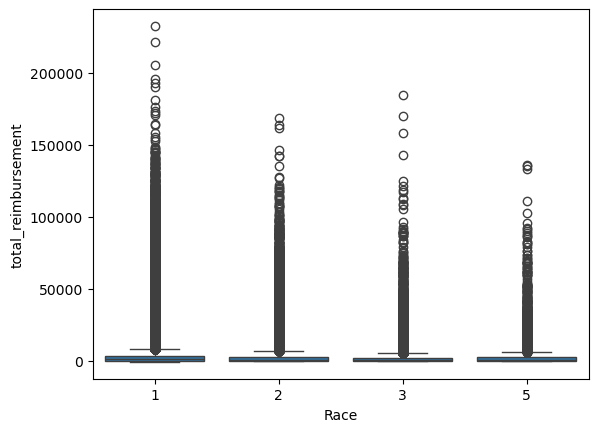

In [21]:
sns.boxplot(x='Race', y='total_reimbursement', data=df)

from scipy.stats import trim_mean

avg_price = df['total_reimbursement'].mean()
print(f"this is the average medicare reimbursement {avg_price}")

trim_price = trim_mean(df["total_reimbursement"], 0.1)
print(f"This is the trimmed avg: {trim_price}")

median = df["total_reimbursement"].median()
print(f"this is the median price: {median}")


In [20]:
#Chronic columns 

chronic_columns = ['Alzhiemers_or_senile',
    'Heart_Failure',
    'Chronic_Kidney',
    'Cancer',
    'COPD',
    'Depression',
    'Diabetes',
    'ischemic_Heart_Disease',
    'Osteoporosis',
    'Rheumatoid_Arthritis',
    'Stroke']

print(df.head())

   Beneficiary Code                    Birth_date Date_of_Death  Gender  Race  \
0  00000B48BCF4AD29 1970-01-01 00:00:00.019230901           NaT       2     5   
1  0000525AB30E4DEF 1970-01-01 00:00:00.019201001           NaT       2     1   
2  00009C897C3D8372 1970-01-01 00:00:00.019320101           NaT       1     1   
3  0001168CE43BE51B 1970-01-01 00:00:00.019340901           NaT       2     1   
4  0002E494BC87CE10 1970-01-01 00:00:00.019140701           NaT       1     2   

  End_Stage_Renal_Disease_Indicator  State_code  County_code  \
0                                 0          10          260   
1                                 0          31          300   
2                                 Y           7           70   
3                                 0           6          200   
4                                 0           5          200   

   Number_of_months_covered_a  Numver_of_months_covered_b  ...  \
0                          12                          12  ...

<Axes: >

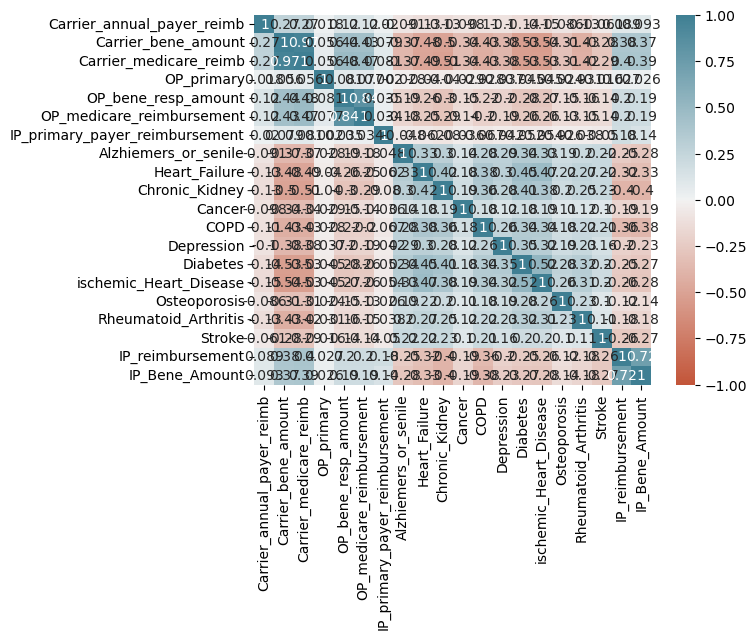

In [26]:
numeric_df = df[['Carrier_annual_payer_reimb','Carrier_bene_amount','Carrier_medicare_reimb','OP_primary','OP_bene_resp_amount','OP_medicare_reimbursement','IP_primary_payer_reimbursement','Alzhiemers_or_senile',
     'Heart_Failure',
    'Chronic_Kidney',
    'Cancer',
     'COPD',
     'Depression',
     'Diabetes',
    'ischemic_Heart_Disease',
     'Osteoporosis',
  'Rheumatoid_Arthritis',
    'Stroke',
    'IP_reimbursement',
    'IP_Bene_Amount']]

sns.heatmap(numeric_df.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20,220, as_cmap=True), annot=True)